In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle

# D:\Chrome Downloads\kaggleDatasetForProject\seg_train\seg_train\buildings
DATADIR = "D:\Chrome Downloads\kaggleDatasetForProject\seg_train\seg_train"
CATEGORIES = ["buildings", "forest", "glacier","mountain", "sea", "street"]

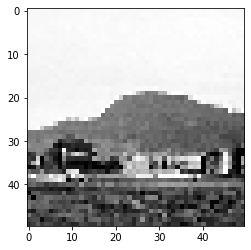

In [31]:
newArr = cv2.resize(img_array, (50,50))
plt.imshow(newArr, cmap="gray")
plt.show()

In [8]:
trainingData = []

def make():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        classification = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            newArr = cv2.resize(img_array, (50,50))
            trainingData.append([newArr,classification])
make()

In [9]:
print(len(trainingData))

14034


In [21]:
import random
def fisherYates(arr, sz):
    for i in range(sz-1, 0, -1):
        r = random.randint(0,i+1)
        arr[i],arr[r] = arr[r], arr[i]
    return arr

fisherYates(trainingData, len(trainingData))


for s in trainingData[:15]:
    print(s[1])

2
2
5
2
1
3
2
2
1
3
5
4
4
5
5


In [22]:
X = []
y = []

In [23]:
for f,l in trainingData:
    X.append(f)
    y.append(l)

X = np.array(X).reshape(-1, 50, 50, 1)

In [24]:
# SAVING DATA TO REDUCE RUNTIME
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [4]:
# IMPORTING SAVED DATA
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [6]:
X.shape

(14034, 50, 50, 1)